In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

# loading the dataset

In [3]:
dataset=pd.read_excel(r'C:\Users\L2456223\Documents\datasets\online+retail\Online Retail2.xlsx')

In [4]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
dataset.rename(columns={'Description': 'product'}, inplace=True)


In [6]:
dataset.shape

(541909, 8)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   product      540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
dataset['InvoiceNo'].describe()

count     541909
unique     25900
top       573585
freq        1114
Name: InvoiceNo, dtype: int64

In [10]:
dataset['InvoiceNo'].duplicated().any()

True

In [11]:
dataset['StockCode'].describe()

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

In [12]:
dataset['StockCode'].duplicated().any()

True

In [18]:
dataset['product'].describe()

count                                 540455
unique                                  4223
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2369
Name: product, dtype: object

In [19]:
dataset['product'].isnull().sum()

1454

In [20]:
dataset['product'].fillna('No Description', inplace=True)

In [21]:
dataset['product'].isnull().sum()

0

thus description column contains about more than 1000 null values

In [22]:
dataset['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

there are negative values in the quantity column. but quantity of items is a value that cannot be negative.

thus assuming that this is wrong data we shall remove the negative and treated as positive values 

In [23]:
dataset['Quantity'] =dataset['Quantity'].astype(str)

In [24]:
dataset['Quantity'] = dataset['Quantity'].str.replace('-', '')


In [25]:
dataset['Quantity'] = pd.to_numeric(dataset['Quantity'], errors='coerce')

In [26]:
dataset['Quantity'].describe()

count    541909.000000
mean         11.340487
std         217.995482
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

all negative values resolved

In [27]:
dataset['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [28]:
dataset = dataset[dataset['UnitPrice'] >= 0]

In [29]:
dataset['UnitPrice'].describe()

count    541907.000000
mean          4.651957
std          94.395447
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

observe that min unit price is 0 where in an invoice the unit price of product being 0 doesnt make sense. thus below here creating subset of our data to check what kind of data has unit price=0

In [30]:
data = dataset[['product','UnitPrice']]

In [31]:
filtered_data = data[data['UnitPrice'] == 0.0]

In [32]:
filtered_data.shape

(2515, 2)

In [33]:
filtered_data.head(30)

,product,UnitPrice
622,No Description,0.0
1970,No Description,0.0
1971,No Description,0.0
1972,No Description,0.0
1987,No Description,0.0
1988,No Description,0.0
2024,No Description,0.0
2025,No Description,0.0
2026,No Description,0.0
2406,No Description,0.0


it is irrelevant data so we can get rid of it

In [34]:
dataset['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [35]:
dataset['CustomerID'].duplicated().any()

True

# cleaning and preprocessing

In [36]:
df_copy = dataset.drop(dataset[dataset.UnitPrice == 0.0].index)

In [37]:
df_copy

,InvoiceNo,StockCode,product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [39]:
df_copy.rename(columns={'total': 'totalprice'}, inplace=True)

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   product      539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539392 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


In [46]:
df_copy['product'].describe()

count                                 539392
unique                                  4042
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2365
Name: product, dtype: object

In [47]:
dataset_final['CustomerID'] =dataset_final['CustomerID'].astype(str)

NameError: name 'dataset_final' is not defined

In [53]:
dataset_final['InvoiceYear'] =dataset_final['InvoiceYear'].astype(str)

In [52]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   product      539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539392 non-null  object        
 8   totalprice   539392 non-null  float64       
 9   InvoiceYear  539392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 45.3+ MB


In [ ]:
dataset_final.describe()

#  feature engineering

In [48]:
dataset_final=df_copy

we observe that there's no metric giving total price of the invoice, so we shall add it

In [49]:
dataset_final['totalprice'] =  dataset_final['Quantity']*dataset_final['UnitPrice']

In [50]:
dataset_final['InvoiceYear'] = dataset_final['InvoiceDate'].dt.year

In [51]:
dataset_final

,InvoiceNo,StockCode,product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalprice,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011


In [54]:
dataset_final['Quantity'].describe()

count    539392.000000
mean         10.875115
std         215.363145
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

# data visualization

In [55]:
v1 = dataset_final[['InvoiceNo','StockCode','CustomerID','product','Quantity','UnitPrice','totalprice','InvoiceYear','Country']]

In [56]:
v1

,InvoiceNo,StockCode,CustomerID,product,Quantity,UnitPrice,totalprice,InvoiceYear,Country
0,536365,85123A,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,United Kingdom
1,536365,71053,17850.0,WHITE METAL LANTERN,6,3.39,20.34,2010,United Kingdom
2,536365,84406B,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,United Kingdom
3,536365,84029G,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,United Kingdom
4,536365,84029E,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12680.0,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,2011,France
541905,581587,22899,12680.0,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,2011,France
541906,581587,23254,12680.0,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,2011,France
541907,581587,23255,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,2011,France


In [57]:
most_popular= v1['product'].mode()
most_popular

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: product, dtype: object

Text(0.5, 1.0, 'Yearwise Sales')

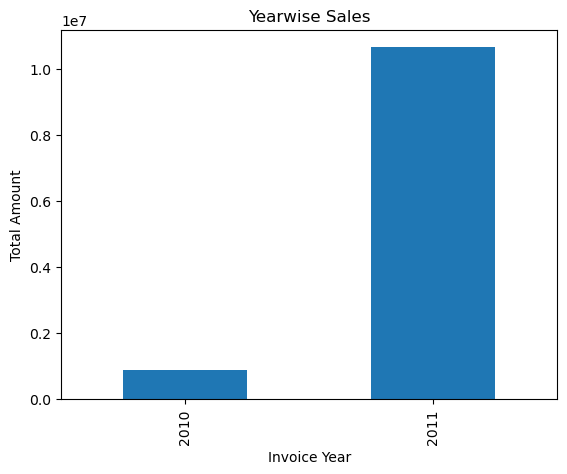

In [59]:
v1.groupby('InvoiceYear')['totalprice'].sum().plot(kind = 'bar')
plt.xlabel('Invoice Year')   # X-axis label
plt.ylabel('Total Amount')    # Y-axis label
plt.title('Yearwise Sales')

In [60]:
v2 =v1.groupby('Country')['totalprice'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Top Countries-Sales')

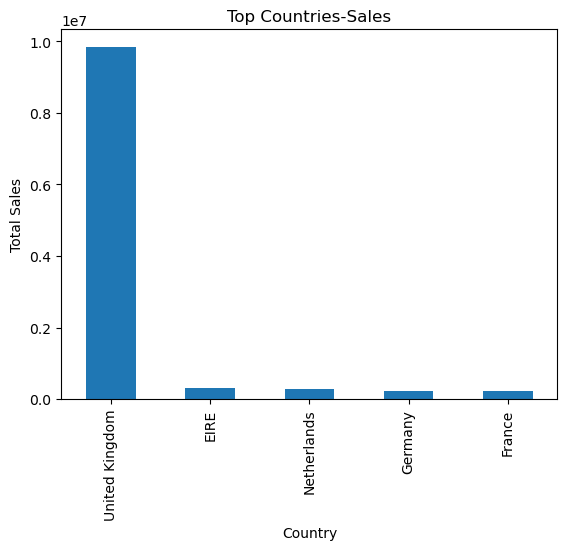

In [61]:
v2[:5].plot(kind = 'bar')
plt.xlabel('Country')   # X-axis label
plt.ylabel('Total Sales')    # Y-axis label
plt.title('Top Countries-Sales')

Text(0.5, 1.0, 'lowest Countries-Sales')

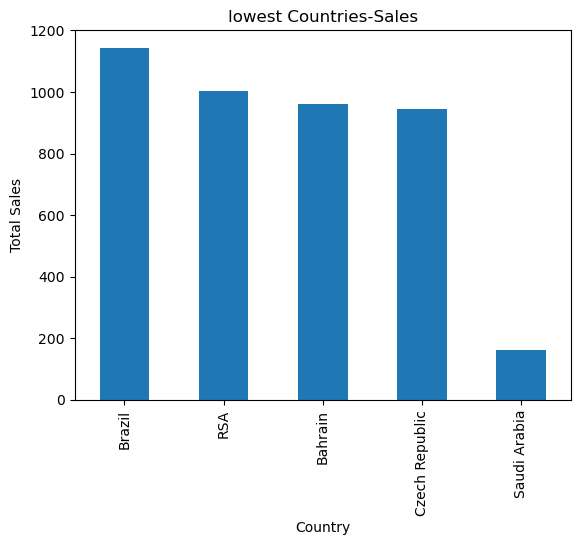

In [62]:
v2[-5:].plot(kind = 'bar')
plt.xlabel('Country')   # X-axis label
plt.ylabel('Total Sales')    # Y-axis label
plt.title('lowest Countries-Sales')

In [63]:
v3 = v1.groupby(['StockCode', 'product'])['Quantity'].sum().sort_values(ascending=False).reset_index()


In [64]:
v3.head(20)

,StockCode,product,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",161990
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,152527
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,56247
3,85099B,JUMBO BAG RED RETROSPOT,49589
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,40177
5,22197,POPCORN HOLDER,37188
6,21212,PACK OF 72 RETROSPOT CAKE CASES,36799
7,84879,ASSORTED COLOUR BIRD ORNAMENT,36541
8,23084,RABBIT NIGHT LIGHT,30896
9,22492,MINI PAINT SET VINTAGE,26829


In [66]:
v3 =v1.groupby('product')['Quantity'].sum().sort_values(ascending = False)

In [67]:
v3.head(20)

product
PAPER CRAFT , LITTLE BIRDIE           161990
MEDIUM CERAMIC TOP STORAGE JAR        152527
WORLD WAR 2 GLIDERS ASSTD DESIGNS      56247
JUMBO BAG RED RETROSPOT                49589
WHITE HANGING HEART T-LIGHT HOLDER     40469
POPCORN HOLDER                         37188
PACK OF 72 RETROSPOT CAKE CASES        36799
ASSORTED COLOUR BIRD ORNAMENT          36541
RABBIT NIGHT LIGHT                     30896
MINI PAINT SET VINTAGE                 26829
PACK OF 12 LONDON TISSUES              26159
PACK OF 60 PINK PAISLEY CAKE CASES     24955
VICTORIAN GLASS HANGING T-LIGHT        24754
ASSORTED COLOURS SILK FAN              24570
BROCADE RING PURSE                     23059
RED  HARMONICA IN BOX                  22000
JUMBO BAG PINK POLKADOT                21921
SMALL POPCORN HOLDER                   20204
LUNCH BAG RED RETROSPOT                19927
PAPER CHAIN KIT 50'S CHRISTMAS         19808
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Highly brought Products')

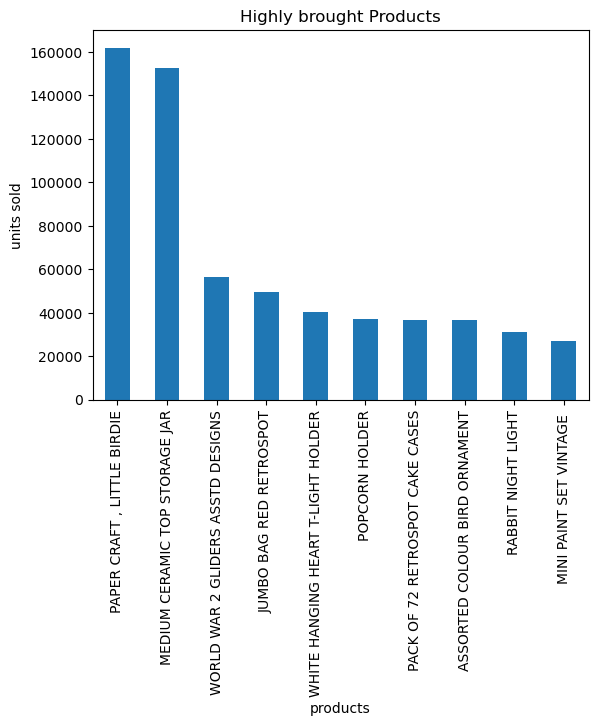

In [68]:
v3[:10].plot(kind = 'bar')
plt.xlabel('products')   # X-axis label
plt.ylabel('units sold')    # Y-axis label
plt.title('Highly brought Products')

Text(0.5, 1.0, 'lesser brought Products')

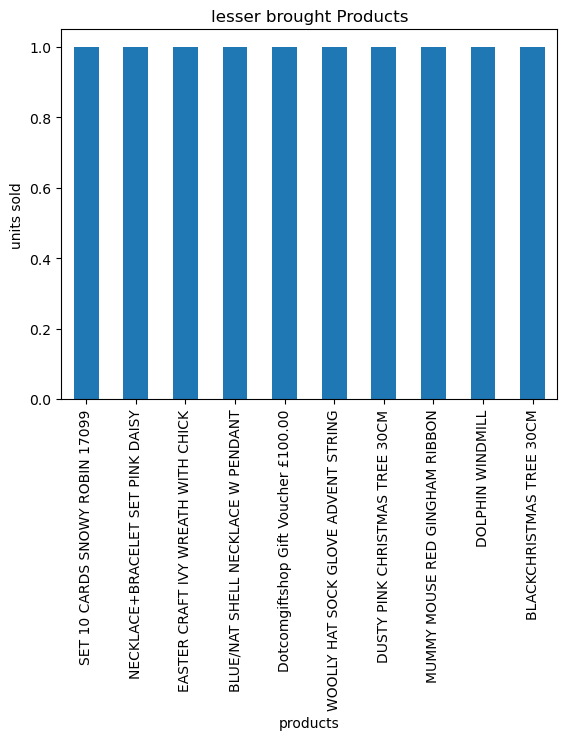

In [69]:
v3[-10:].plot(kind = 'bar')
plt.xlabel('products')   # X-axis label
plt.ylabel('units sold')    # Y-axis label
plt.title('lesser brought Products')

# getting frequent itemsets for top ten

In [90]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [78]:
v3 = v1.groupby(['StockCode', 'product'])['Quantity'].sum().sort_values(ascending=False).reset_index()


In [80]:
v3

,StockCode,product,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",161990
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,152527
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,56247
3,85099B,JUMBO BAG RED RETROSPOT,49589
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,40177
...,...,...,...
4172,23609,SET 10 CARDS SNOWY ROBIN 17099,1
4173,85098B,BLUE FLYING SINGING CANARY,1
4174,23602,SET 10 CARDS 3 WISE MEN 17107,1
4175,85160a,WHITE BIRD GARDEN DESIGN MUG,1


In [82]:
stock_codes_list = v3['StockCode'].iloc[:10].tolist()

print("First ten stock codes:", first_ten_stockcodes)

First ten stock codes: [23843, 23166, 84077, '85099B', '85123A', 22197, 21212, 84879, 23084, 22492]


In [83]:
stock_codes_list

[23843, 23166, 84077, '85099B', '85123A', 22197, 21212, 84879, 23084, 22492]

In [84]:
top_products = dataset_final[dataset_final['StockCode'].isin(stock_codes_list)]

# Print the filtered DataFrame
top_products

,InvoiceNo,StockCode,product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalprice,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010
44,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583.0,France,23.40,2010
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,2010
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.30,2010
...,...,...,...,...,...,...,...,...,...,...
541678,581538,22197,POPCORN HOLDER,4,2011-12-09 11:34:00,0.85,14446.0,United Kingdom,3.40,2011
541824,581579,23084,RABBIT NIGHT LIGHT,24,2011-12-09 12:19:00,1.79,17581.0,United Kingdom,42.96,2011
541825,581579,22197,POPCORN HOLDER,24,2011-12-09 12:19:00,0.85,17581.0,United Kingdom,20.40,2011
541874,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,2.08,15804.0,United Kingdom,24.96,2011


In [86]:
basket2 = (top_products.groupby(['InvoiceNo', 'product'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket2

product,ASSORTED COLOUR BIRD ORNAMENT,CREAM HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,MEDIUM CERAMIC TOP STORAGE JAR,MINI PAINT SET VINTAGE,PACK OF 72 RETROSPOT CAKE CASES,"PAPER CRAFT , LITTLE BIRDIE",POPCORN HOLDER,RABBIT NIGHT LIGHT,SMALL POPCORN HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WORLD WAR 2 GLIDERS ASSTD DESIGNS
InvoiceNo,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
536367,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
C581128,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581229,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [87]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets2 = basket2.applymap(encode_units)
basket_sets2

product,ASSORTED COLOUR BIRD ORNAMENT,CREAM HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,MEDIUM CERAMIC TOP STORAGE JAR,MINI PAINT SET VINTAGE,PACK OF 72 RETROSPOT CAKE CASES,"PAPER CRAFT , LITTLE BIRDIE",POPCORN HOLDER,RABBIT NIGHT LIGHT,SMALL POPCORN HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,WORLD WAR 2 GLIDERS ASSTD DESIGNS
InvoiceNo,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,1,0
536367,1,0,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,1,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,1,0
536375,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
C581128,0,0,1,0,0,0,0,0,0,0,0,0
C581229,0,0,1,0,0,0,0,0,0,0,0,0
C581460,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.01, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head()

C:\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SMALL POPCORN HOLDER),(JUMBO BAG RED RETROSPOT),0.078885,0.278912,0.026295,0.333333,1.195122,0.004293,1.081633,0.177248
1,(JUMBO BAG RED RETROSPOT),(SMALL POPCORN HOLDER),0.278912,0.078885,0.026295,0.094278,1.195122,0.004293,1.016994,0.226415
2,(POPCORN HOLDER),(PACK OF 72 RETROSPOT CAKE CASES),0.109759,0.174516,0.022894,0.208582,1.195201,0.003739,1.043044,0.183457
3,(PACK OF 72 RETROSPOT CAKE CASES),(POPCORN HOLDER),0.174516,0.109759,0.022894,0.131184,1.195201,0.003739,1.024660,0.197848
4,(SMALL POPCORN HOLDER),(PACK OF 72 RETROSPOT CAKE CASES),0.078885,0.174516,0.016614,0.210614,1.206844,0.002848,1.045729,0.186071


In [92]:
frequently_brought_together2 = rules2[['antecedents','consequents']].copy()
frequently_brought_together2

,antecedents,consequents
0,(SMALL POPCORN HOLDER),(JUMBO BAG RED RETROSPOT)
1,(JUMBO BAG RED RETROSPOT),(SMALL POPCORN HOLDER)
2,(POPCORN HOLDER),(PACK OF 72 RETROSPOT CAKE CASES)
3,(PACK OF 72 RETROSPOT CAKE CASES),(POPCORN HOLDER)
4,(SMALL POPCORN HOLDER),(PACK OF 72 RETROSPOT CAKE CASES)
5,(PACK OF 72 RETROSPOT CAKE CASES),(SMALL POPCORN HOLDER)
6,(RABBIT NIGHT LIGHT),(POPCORN HOLDER)
7,(POPCORN HOLDER),(RABBIT NIGHT LIGHT)
8,"(WHITE HANGING HEART T-LIGHT HOLDER, PACK OF 7...",(JUMBO BAG RED RETROSPOT)
9,"(PACK OF 72 RETROSPOT CAKE CASES, JUMBO BAG RE...",(WHITE HANGING HEART T-LIGHT HOLDER)


# getting freuent itemsets

In [89]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
basket = (v1[v1['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

In [ ]:
frequently_brought_together = rules[['antecedents','consequents']].copy()
frequently_brought_together


# getting recommendtions

In [93]:

from sklearn.metrics.pairwise import cosine_similarity

In [94]:
v3.head(20)

,StockCode,product,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",161990
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,152527
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,56247
3,85099B,JUMBO BAG RED RETROSPOT,49589
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,40177
5,22197,POPCORN HOLDER,37188
6,21212,PACK OF 72 RETROSPOT CAKE CASES,36799
7,84879,ASSORTED COLOUR BIRD ORNAMENT,36541
8,23084,RABBIT NIGHT LIGHT,30896
9,22492,MINI PAINT SET VINTAGE,26829


In [95]:
customer_item_matrix = dataset_final.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [96]:
print(customer_item_matrix.shape)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

(4371, 3684)


In [97]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [98]:
print(item_item_sim_matrix)

StockCode     10002     10080     10120     10125     10133     10135  \
StockCode                                                               
10002      1.000000  0.000000  0.094868  0.090351  0.062932  0.098907   
10080      0.000000  1.000000  0.000000  0.032774  0.045655  0.047836   
10120      0.094868  0.000000  1.000000  0.057143  0.059702  0.041703   
10125      0.090351  0.032774  0.057143  1.000000  0.042644  0.044682   
10133      0.062932  0.045655  0.059702  0.042644  1.000000  0.280097   
...             ...       ...       ...       ...       ...       ...   
D          0.032275  0.000000  0.040825  0.029161  0.020311  0.042563   
DOT        0.000000  0.000000  0.000000  0.000000  0.000000  0.104257   
M          0.086284  0.013910  0.072761  0.077958  0.078433  0.082180   
PADS       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
POST       0.073096  0.000000  0.010273  0.073381  0.025556  0.037487   

StockCode     11001     15030     15034     15036 

In [101]:
for input_stockcode in stock_codes_list:
    input_stock_description = dataset_final.loc[dataset_final['StockCode'] == input_stockcode, 'product'].iloc[0]
    
    print("Recommendations for:", input_stockcode, "-", input_stock_description)
    
    top_similar_items = list(item_item_sim_matrix.loc[input_stockcode].sort_values(ascending=False).iloc[:5].index)

    print("{:<15} {:<50} {:<20}".format("StockCode", "product", "Similarity Score"))
    
    for similar_item in top_similar_items:
        similarity_score = item_item_sim_matrix.loc[input_stockcode, similar_item]
        similar_item_description = dataset_final.loc[dataset_final['StockCode'] == similar_item, 'product'].iloc[0]
        print("{:<15} {:<50} {:<20}".format(similar_item, similar_item_description, similarity_score))
    
    print()




Recommendations for: 23843 - PAPER CRAFT , LITTLE BIRDIE
StockCode       product                                            Similarity Score    
23843           PAPER CRAFT , LITTLE BIRDIE                        1.0                 
22982           PANTRY PASTRY BRUSH                                0.09128709291752768 
22980           PANTRY SCRUBBING BRUSH                             0.07106690545187015 
72817           SET OF 2 CHRISTMAS DECOUPAGE CANDLE                0.0                 
72232           FENG SHUI PILLAR CANDLE                            0.0                 

Recommendations for: 23166 - MEDIUM CERAMIC TOP STORAGE JAR
StockCode       product                                            Similarity Score    
23166           MEDIUM CERAMIC TOP STORAGE JAR                     1.0000000000000002  
23165           LARGE CERAMIC TOP STORAGE JAR                      0.6718965219544801  
23167           SMALL CERAMIC TOP STORAGE JAR                      0.6595508339394889  
22

In [100]:
#for input_stockcode in stock_codes_list:
    input_stock_description = dataset_final.loc[dataset_final['StockCode'] == input_stockcode, 'product'].iloc[0]
    
    print("Recommendations for:", input_stockcode, "-", input_stock_description)
    
    top_similar_items = list(item_item_sim_matrix.loc[input_stockcode].sort_values(ascending=False).iloc[:5].index)

    print(top_similar_items)
    print()
    print(dataset_final.loc[dataset_final['StockCode'].isin(top_similar_items),['StockCode', 'product']].drop_duplicates().set_index('StockCode').loc[top_similar_items])
    print()


Recommendations for: 23843 - PAPER CRAFT , LITTLE BIRDIE
[23843, 22982, 22980, 72817, 72232]

                                       product
StockCode                                     
23843              PAPER CRAFT , LITTLE BIRDIE
22982                      PANTRY PASTRY BRUSH
22980                   PANTRY SCRUBBING BRUSH
72817      SET OF 2 CHRISTMAS DECOUPAGE CANDLE
72232                  FENG SHUI PILLAR CANDLE

Recommendations for: 23166 - MEDIUM CERAMIC TOP STORAGE JAR
[23166, 23165, 23167, 22993, 23307]

                                       product
StockCode                                     
23166           MEDIUM CERAMIC TOP STORAGE JAR
23165            LARGE CERAMIC TOP STORAGE JAR
23167           SMALL CERAMIC TOP STORAGE JAR 
22993             SET OF 4 PANTRY JELLY MOULDS
23307      SET OF 60 PANTRY DESIGN CAKE CASES 

Recommendations for: 84077 - WORLD WAR 2 GLIDERS ASSTD DESIGNS
[84077, 21790, 21915, 21889, 21914]

                                     product
Stoc